\***\*============================GRAPH PREPROCESSING============================**


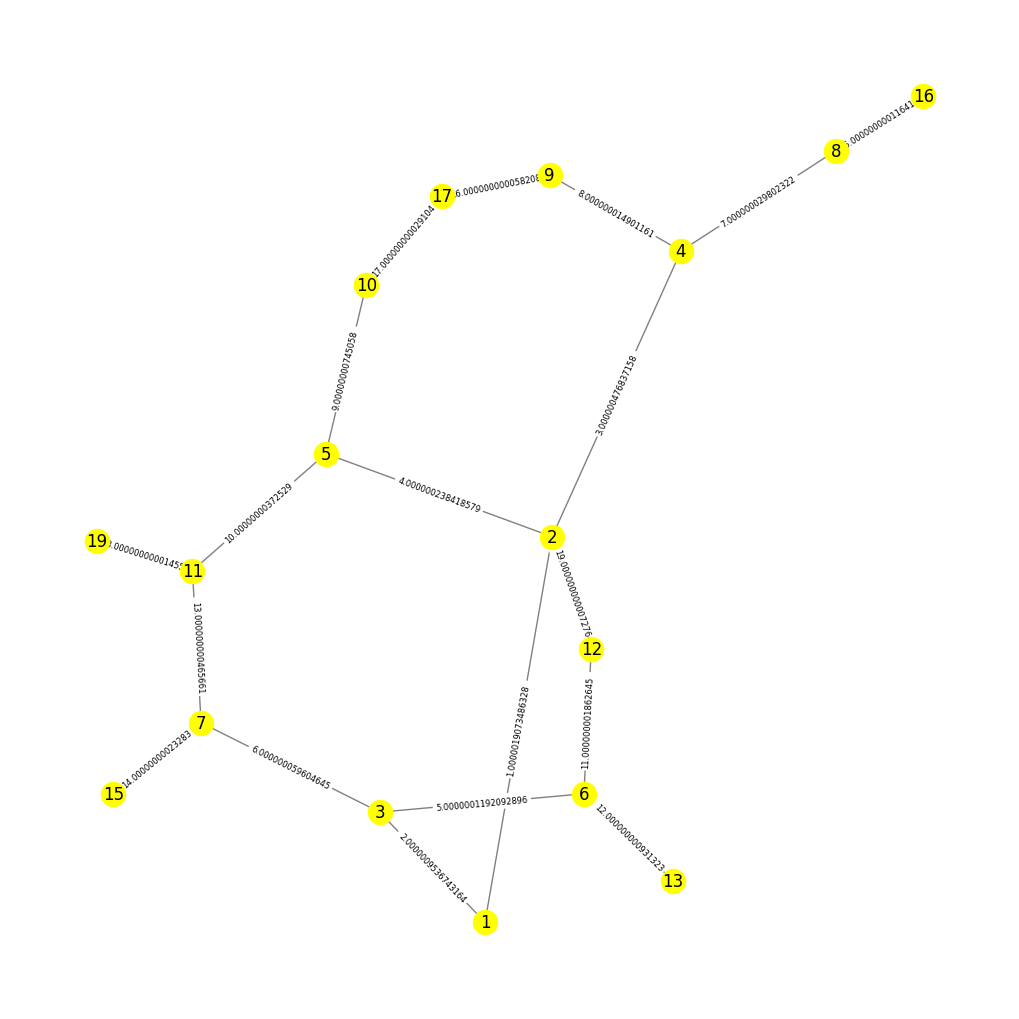

In [94]:
# Example usage
import networkx as nx
import matplotlib.pyplot as plt
# Define the Edge class
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight
        
class Graph:
    def __init__(self):
        self.graph = {}
    def add_edge(self, u, v, weight):
        if u not in self.graph:
            self.graph[u] = {}
        if v not in self.graph:
            self.graph[v] = {}
        self.graph[u][v] = weight
        self.graph[v][u] = weight  # add the edge (v, u) as well
    def get_edge_weight(self, u, v):
        return self.graph.get(u, {}).get(v, self.graph.get(v, {}).get(u, float("inf")))   
def preprocess_graph(G):
    # assuming 'weight' is the name of the attribute for edge weights
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))
# num_nodes = 10
# Define a small fraction
fraction = []
for i in range(19):
    fraction.append(1/(2 ** (19+i)))
# Generate edges with unique weights
edges = [
    Edge(1, 2, 1 + fraction[0]),
    Edge(1, 3, 2 + fraction[1]),
    Edge(2, 4, 3 + fraction[2]),
    Edge(2, 5, 4 + fraction[3]),
    Edge(3, 6, 5 + fraction[4]),
    Edge(3, 7, 6 + fraction[5]),
    Edge(4, 8, 7 + fraction[6]),
    Edge(4, 9, 8 + fraction[7]),
    Edge(5, 10, 9 + fraction[8]),
    Edge(5, 11, 10 + fraction[9]),
    Edge(6, 12, 11 + fraction[10]),
    Edge(6, 13, 12 + fraction[11]),
    Edge(7, 11, 13 + fraction[12]),
    Edge(7, 15, 14 + fraction[13]),
    Edge(8, 16, 15 + fraction[14]),
    Edge(9, 17, 16 + fraction[15]),
    Edge(10, 17, 17 + fraction[16]),
    Edge(11, 19, 18 + fraction[17]),
    Edge(12, 2, 19 + fraction[18]),
]
G = nx.Graph()
# Add edges to the graph
for edge in edges:
    # print(edge.u, edge.v, edge.weight)
    # sum_weight = sum_weight + int(edge.weight)
    G.add_edge(edge.u, edge.v, weight=edge.weight)
# G = G.to_undirected()
# Preprocess the graph
D = preprocess_graph(G)
# Create a new figure with a larger size
plt.figure(figsize=(10, 10))
# Draw the graph using the spring_layout
pos = nx.spring_layout(G)
nx.draw(
    G, pos, with_labels=True, node_color="yellow", node_size=300, edge_color="gray"
)
# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_size=6)
plt.show()
# print(D)


=================================== Distance Oracle =====================================


In [95]:
class DistanceOracle:
    def __init__(self,distances=None):
        if distances is None:
            self.data = {}
        else:
            self.data = distances
    def get_distance(self, u, v):
        return self.data.get(u, {}).get(v, float("inf"))
    def __getitem__(self, key):
        return self.data[key]
    def add_distance(self, u, v, distance):
        if u not in self.data:
            self.data[u] = {}
        self.data[u][v] = distance
    # def add_edge(u, v, weight):
    #     G.add_edge(u, v, weight=weight)
    # def get_edge_weight(G, u, v):
    #     if G.has_edge(u, v):
    #         return G[u][v]['wight']
    #     else:
    #         reurn None

In [96]:
# Create an instance of
distance_oracle = DistanceOracle(D)

\*\*---------------------------------SHORTEST PATH function and Store-------------------------------


In [97]:
import networkx as nx
def store_shortest_paths(G):
    shortest_paths = {}
    for u in G.nodes:
        for v in G.nodes:
            if u == v:
                shortest_paths[(u, v)] = [u]
            else:
                try:
                    path = nx.dijkstra_path(G, u, v, weight="weight")
                    shortest_paths[(u, v)] = path
                    # shortest_paths[(v, u)] = path[::-1]  # reverse path for (v, u)
                except nx.NetworkXNoPath:
                    shortest_paths[(u, v)] = None
                    # shortest_paths[(v, u)] = None
    return shortest_paths
shortest_paths = store_shortest_paths(G)
# Now you can access the shortest path between any pair of nodes like this:
# print(shortest_paths[(13, 19)])
# this will give the reverse of the path from 13 to 19
# print(shortest_paths[(19, 13)])

---------------------------------POWER_OF_2 FUNCTION--------------------------------


In [98]:
import math



def nearest_power_of_2(x):
    if x <= 0:
        return 0 # Return 1 for non-positive input
    elif math.isinf(x):
        return float("inf")  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

--------------------------------FIND_JUMP FUNCTION--------------------------------


In [99]:
def FINDJUMP(P, F):
    X = []  # Initialize X with s
    x = P[0]
    X.append(x)
    # F = list(F)
    # vertices = [F.u , F.v]
   
    if(nearest_power_of_2(
        distance_oracle.get_distance(x, F[0]))< nearest_power_of_2(distance_oracle.get_distance(x, F[1]))):
            u = F[0]
    else:
        u = F[1]
    
    # u = min(F, key=lambda v: nearest_power_of_2(
    #     distance_oracle.get_distance(x, v)))
    # print(u)
    while True:
        # Find y, the first vertex on P[x, t] at distance >= max{1, (xu)^2} from x
        distance = max(1, nearest_power_of_2(
            distance_oracle.get_distance(x, u)))
        # print(distance)
        y = None
        for vertex in P[P.index(x)+1:]:
            if distance_oracle.get_distance(x, vertex) >= distance:
                y = vertex
                break
        if y is not None:
            X.append(y)
            x = y
        else:
            break
    return X

In [100]:
m = FINDJUMP([13, 6, 3, 7, 11, 19], [6, 3])
print(m)

[13, 6, 3, 7, 11, 19]


**------------------------------MAXIMIZER FUNCTION--------------------------------
**


In [101]:
def get_edge_weight(G, u, v):
    if G.has_edge(u, v):
        return G[u][v]['weight']
    else:
        return float('inf') 

In [102]:

def maximizer(x, y, d1, d2):
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and it length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i +1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges i edge list
    for u, v in edges_set:
        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            #nx.has_path(G, x, u)
            # and nx.has_path(G, y, v)
            # and
            (distance_oracle.get_distance(x, u) >= d1
             and distance_oracle.get_distance(y, v) >= d2)
            or (distance_oracle.get_distance(x, u) >= d2
                and distance_oracle.get_distance(y, v) >=d1)
        ):
            max_edge1 = (u, v)
            max_edges.add(max_edge1)
    # print(max_edges)
    for u, v in max_edges:
        max_xy_distance = float('-inf')
        # Create a copy of the graph for modification
        G_copy = G.copy()
        edge_attributes = G_copy.get_edge_data(u, v)
        # original_weight = edge_attributes['weight']
        # Remove the (u, v) edge from the copy
        if G_copy.has_edge(u, v):
            G_copy.remove_edge(u, v)
        # Calculate the xy path distance using the modified copy
        D = preprocess_graph(G_copy)
        distance_oracle_new = DistanceOracle(D)
        if nx.has_path(G_copy, x, y):  # Ensure there is still a path
            xy_path = nx.dijkstra_path(G_copy, x, y, weight='weight')
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            if max_uv_distance > max_xy_distance:
                max_xy_edge = (u, v)
                max_xy_path = xy_path
                max_xy_distance = max_uv_distance
    # # chandge max_xy_path to 2D-composable form
    
    if max_xy_path is not None:
        s=0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = distance_oracle.get_distance(u, v)
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            # print(f"uv_distance:{uv_distance}")
            # print(f"uv_distance_path:{uv_distance_path}")
            # s_to_a_path = [u]
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    # print(f"intermediate:{intermediate_edge}")
                    # print(f"i:{i}")
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        
        if len(max_xy_path_new) == 1:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
    return max_xy_edge, max_xy_path_new

In [103]:
maximizer(13, 3, 8, 0)

((6, 3), [[13, 12], (2, 1), [1, 3]])

==============================MAXIMIZER Storage=========================================


In [104]:
def find_max_distance(G, distance_oracle):
    max_distance = float("-inf")
    for key1, value1 in distance_oracle.items():
        for key2, value2 in value1.items():
            if value2 > max_distance:
                max_distance = value2
    return max_distance

In [105]:
max_d_value = int(find_max_distance(G, D))
d1_d2_list = [0]
i = nearest_power_of_2((max_d_value))


while i >= 1:
    d1_d2_list.append(i)
    i //= 2

In [106]:
# Initialize a dictionary to store the maximizer output
function_dict = {
    "maximizer": maximizer  # Replace 'maximizer' with the actual function name
}
maximizer_dict = {}


# Iterate over all pairs of nodes in the graph
for x in G.nodes:
    for y in G.nodes:
        if(x==y):
            continue 
        for d1 in d1_d2_list:
            for d2 in d1_d2_list:

                try:
                    #Call the maximizer function and store the result
                    result = function_dict["maximizer"](x, y, d1, d2)
                    if result is not None:
                        max_edge, max_path = result
                        # Store the result in the results dictionary
                        maximizer_dict[(x, y, d1, d2)] = (max_edge, max_path)
                except nx.NetworkXNoPath:
                    print(f"No path between {x} and {y}.")
# print(maximizer_dict)

In [107]:
shortest_paths[(1, 16)]

[1, 2, 4, 8, 16]

In [108]:
maximizer(13, 3, 8, 0)

maximizer_dict[(13, 3, 8, 0)]

((6, 3), [[13, 12], (2, 1), [1, 3]])

===============================MAIN: QUERY FUNCTION====================================


In [109]:
def is_valid_path(G, path):
    return all(G.has_edge(path[i], path[i + 1]) for i in range(len(path) - 1)) and (
        len(path) < 2 or G.has_edge(path[-2], path[-1])
    )
def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result
def QUERY(s, t, e):
    if e == []:
        return shortest_paths[(s, t)]
    # Check if the edge e is in the graph
    if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
        print("The edge to avoid is not in the graph.")
        return [], float("inf")
    if distance_oracle.get_distance(s, e.u) > distance_oracle.get_distance(s, e.v):
        e.u, e.v = e.v, e.u
    # Check if there is a valid path between s and t
    if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
        print("There is no valid path between the source and destination vertices.")
        return [], float("inf")
    # print(f"shortest_paths[(s,t)]={shortest_paths[(s, t)]}")
    JUMP_st = FINDJUMP(shortest_paths[(s, t)], [e.u, e.v])
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], [e.u, e.v])
    # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")
    final_shortest_path = []
    shortest_path_distance = float("inf")
    for x in JUMP_st:
        for y in JUMP_ts:
            if x == y:
                continue
            # print(f"x={x}, y={y}")
            d1 = nearest_power_of_2(distance_oracle.get_distance(x, e.u))
            d2 = nearest_power_of_2(distance_oracle.get_distance(y, e.v))
            # print(f"d1={d1}, d2={d2}")
            e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
            # print(f"e_star={e_star}, xy_e_star={xy_e_star}")
            if xy_e_star is None:
                xy_e_star = []
            elif len(xy_e_star)> 2:
                # Flatten the list of lists
                xy_e_star = shortest_paths[(xy_e_star[0][0], xy_e_star[0][1])] + [xy_e_star[1][0]] + shortest_paths[(
                    # print(f"xy_e_star={xy_e_star}")
                    xy_e_star[2][0], xy_e_star[2][1])]
            else: 
                xy_e_star = xy_e_star[0]
            sx_path = shortest_paths[(s, x)]
            yt_path = shortest_paths[(y, t)]
            # print(f"sx_path={sx_path}, yt_path={yt_path}")
            # if sx_path is None or yt_path is None:
            #     continue  # Skip if there is no valid path from s to x or y to t
            if sx_path is None:
                sx_path = [x]
            if yt_path is None:
                yt_path = [y]
            
            p_distance = float("inf")
            P = sx_path + xy_e_star[1:-1] + yt_path
            P = remove_duplicates(sx_path + xy_e_star + yt_path)
            # print(f"P={P}")
            if is_valid_path(G, P):
                p_distance = sum(
                    get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
                )
            # rint(f"p_distance={p_distance}")
            # else:
            # #     _distance = float('inf')
            # s_u_distance = distance_oracle.get_distance(s, e.u)
            # v_t_distance = distance_oracle.get_distance(e.v, t)
            # u_v_distance = distance_oracle.get_distance(e.u, e.v
            p_edges = [(P[i], P[i+1]) for i in range(len(P) - 1)]
            if ((e.u , e.v) not in p_edges and (e.v , e.u) not in p_edges ) and (p_distance < shortest_path_distance):
                    final_shortest_path = P
                    # print(f"shortest_path1={final_shortest_path}")
                    shortest_path_distance = p_distance
    return final_shortest_path

In [110]:
QUERY(13, 3, Edge(6, 3, get_edge_weight(G, 6, 3)))

[13, 6, 12, 2, 1, 3]

#**-----------------2-fault distance oracle----------------**


##Basic Function


In [111]:
f = 2

In [112]:



def edge_in_path(p, F2):
    if len(p) < 2:
        return False
    p_edges = [(p[i], p[i+ 1]) for i in range(len(p) - 1)]
    for edge in F2:
        if (edge.u ,edge.v) in p_edges or (edge.v , edge.u) in p_edges:
            return True
    return False
def bfs_tree_of_S_rooted_x(graph, s, x):
    # Generate BFS tree rooted at x
    bfs_tree_s = nx.bfs_tree(graph, s)
    # Check if u is in the BFS tree rooted at x
    if x in bfs_tree_s.nodes:
        # Generate BFS tree roted at u from the BFS tree rooted at x
        bfs_tree_x = nx.bfs_tree(bfs_tree_s, x)
        bfs_tree_nodes = list(bfs_tree_x.nodes)
        return bfs_tree_nodes
    else:
        print(f"Node {x} is not in the BFS tree rooted at {s}")
        return None
def intact_from_failure_path(path, F):
    if(path is None):
        return False
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    for edge in F:
        if isinstance(edge, tuple):
           if (edge[0] ,edge[1]) in path_edges or (edge[1] ,edge[0]) in path_edges:
                return False
            
        elif (edge.u , edge.v) in path_edges or (edge.v , edge.u) in path_edges:
            return False
    return True
def intact_from_failure_tree(T, F):
    # Check if any vertex in F is in the tree T
    for edge in F:
        # unpack ede into u and v
        if isinstance(edge, Edge):
            u, v = edge.u, edge.v
        else:
            u,v = edge
        if u in T or v in T:
            return False
    return True
def single_edge_in_path(p, F2):
    if p is not None:
        p_edges = [(p[i], p[i + 1]) for i in range(len(p) - 1)]
        
        for edge in F2:
            # unpack edge into u and v
            if isinstance(edge, Edge):
                u, v = edge.u, edge.v
            else:
                u,v = edge
            # check if the edge is in the path
            if (u, v) in p_edges or (v, u) in p_edges:
                return True
        return False

In [113]:
# intact_from_failure_path(shortest_paths[(13, 19)], [Edge(6, 12, get_edge_weight(G, 6, 12)),
#       Edge(3, 7, get_edge_weight(G, 3, 7))])
# print(bfs_tree_of_S_rooted_x(G, 13, 19))
F2 = [Edge(6, 3, get_edge_weight(G, 6, 3)), Edge(2, 5, get_edge_weight(G, 2, 5))]
edge_in_path([2,5], F2)
F3 = [Edge(1, 3, get_edge_weight(G, 1, 3)), Edge(17, 9, get_edge_weight(G, 17, 9))]

print(single_edge_in_path([3, 1, 2, 4,9], F3))

True


#Maximizer Functions


In [114]:
import dis
import networkx as nx
from numpy import empty, short


def maximizer1(x, y, d1, d2):
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and its length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges in edge list
    for u, v in edges_set:
        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and (
                distance_oracle.get_distance(x, u) >= d1
                and distance_oracle.get_distance(y, v) >= d2
            )
            # r (distance_oracle.get_distance(x, u) >= d2
            #     and distance_oracle.get_distance(y, v) >= d1)
        ):
            max_edge1 = (u, v)
            max_edges.add(max_edge1)
    max_edges = list(max_edges)
    # print(max_edges)
    max_edges_2 = []
    if  max_edges==[]:
        return [],[shortest_paths[(x, y)]] 
    
    if len(max_edges) == 1:
        max_edges_2.append(max_edges[0][0]) 
        max_edges_2.append(max_edges[0][1])
        
    else:
        for i in range(len(max_edges)):
            for j in range(i + 1, len(max_edges)):
                max_edges_2.append((max_edges[i], max_edges[j]))
    # print(max_edges_2)

    G_copy = G.copy()
    if isinstance(max_edges_2[0], int):
        # max_xy_distance = float("-inf")
        if G_copy.has_edge(max_edges_2[0], max_edges_2[1]):
           G_copy.remove_edge(max_edges_2[0], max_edges_2[1])
            # Calculate the xy path distance
        D = preprocess_graph(G_copy)
        distance_oracle_new = DistanceOracle(D)
        if nx.has_path(G_copy, x, y):
            xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
            # print(xy_path)
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            # print(f"max_uv_distance:{max_uv_distance}")
            if max_uv_distance > max_xy_distance:
                max_xy_edge = [max_edges_2[0], max_edges_2[1]]
                max_xy_path = xy_path
                max_xy_distance = max_uv_distance
        
        
    else:
        # G_copy = G.copy()
        for e1 in max_edges_2:
            G_copy = G.copy()
        # print(f"e:{e1 , e2}")
            # max_xy_distance = float("-inf")

            if G_copy.has_edge(e1[0][0], e1[0][1]) and G_copy.has_edge(e1[1][0], e1[1][1]):
                G_copy.remove_edge(e1[0][0], e1[0][1])
                G_copy.remove_edge(e1[1][0], e1[1][1])

    # Calculate the xy path distance
            D = preprocess_graph(G_copy)
            distance_oracle_new = DistanceOracle(D)
            if nx.has_path(G_copy, x, y):
                xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
                # print(xy_path)
                max_uv_distance = distance_oracle_new.get_distance(x, y)
                # print(f"max_uv_distance:{max_uv_distance}")
                if max_uv_distance > max_xy_distance:
                    max_xy_edge = (e1[0], e1[1])
                    max_xy_path = xy_path
                    max_xy_distance = max_uv_distance

    # chandge max_xy_path to 3D-composable form
    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = distance_oracle.get_distance(u, v)
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            # print(f"uv_distance:{uv_distance}")
            # print(f"uv_distance_path:{uv_distance_path}")
            # s_to_a_path = [u]
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    # print(f"intermediate:{intermediate_edge}")
                    # print(f"i:{i}")
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
        if len(max_xy_path_new) == 3:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
    return max_xy_edge, max_xy_path_new

In [115]:
maximizer1(6, 9, 0, 0)
# maximizer1(3, 2, 0, 0)

(((2, 4), (6, 3)), [[6, 12, 2, 5, 10, 17, 9]])

In [116]:
import networkx as nx
def maximizer21(x, y, d1, V, F):
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    
    max_xy_path = None
    max_xy_distance = float("-inf")
    
    max_xy_path_new = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and it length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i +1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges i edge list
    for u, v in edges_set:
        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and (
                distance_oracle.get_distance(x, u) >= d1 or distance_oracle.get_distance(y, v) >= d1
                and intact_from_failure_path(shortest_paths[(V, y)], F)
                and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, y, V), F)
            )
            
        ):
            max_edge1 = (u, v)
            max_edges.add(max_edge1)
        # print(max_edges)
    max_edges = list(max_edges)
    # print(max_edges)
    max_edges_2 = []
    if  max_edges==[]:
        return [],[shortest_paths[(x, y)]] 
    
    if len(max_edges) == 1:
        max_edges_2.append(max_edges[0][0]) 
        max_edges_2.append(max_edges[0][1])
        
    else:
        for i in range(len(max_edges)):
            for j in range(i + 1, len(max_edges)):
                max_edges_2.append((max_edges[i], max_edges[j]))
    # print(max_edges_2)

    G_copy = G.copy()
    if isinstance(max_edges_2[0], int):
        # max_xy_distance = float("-inf")
        if G_copy.has_edge(max_edges_2[0], max_edges_2[1]):
           G_copy.remove_edge(max_edges_2[0], max_edges_2[1])
            # Calculate the xy path distance
        D = preprocess_graph(G_copy)
        distance_oracle_new = DistanceOracle(D)
        if nx.has_path(G_copy, x, y):
            xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
            # print(xy_path)
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            # print(f"max_uv_distance:{max_uv_distance}")
            if max_uv_distance > max_xy_distance:
                max_xy_edge = [max_edges_2[0], max_edges_2[1]]
                max_xy_path = xy_path
                max_xy_distance = max_uv_distance
        
        
    else:
        # G_copy = G.copy()
        for e1 in max_edges_2:
            G_copy = G.copy()
        # print(f"e:{e1 , e2}")
            # max_xy_distance = float("-inf")

            if G_copy.has_edge(e1[0][0], e1[0][1]) and G_copy.has_edge(e1[1][0], e1[1][1]):
                G_copy.remove_edge(e1[0][0], e1[0][1])
                G_copy.remove_edge(e1[1][0], e1[1][1])

    # Calculate the xy path distance
            D = preprocess_graph(G_copy)
            distance_oracle_new = DistanceOracle(D)
            if nx.has_path(G_copy, x, y):
                xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
                # print(xy_path)
                max_uv_distance = distance_oracle_new.get_distance(x, y)
                # print(f"max_uv_distance:{max_uv_distance}")
                if max_uv_distance > max_xy_distance:
                    max_xy_edge = (e1[0], e1[1])
                    max_xy_path = xy_path
                    max_xy_distance = max_uv_distance

    # chandge max_xy_path to 3D-composable form
    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i +1]
            uv_distance = distance_oracle.get_distance(u, v)
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            # print(f"uv_distance:{uv_distance}")
            # print(f"uv_distance_path:{uv_distance_path}")
            # s_to_a_path = [u]
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    # print(f"intermediate:{intermediate_edge}")
                    # print(f"i:{i}")
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
        if len(max_xy_path_new) == 3:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
    return max_xy_edge, max_xy_path_new


In [117]:
import networkx as nx
def maximizer2(x, y, V, d2, F):
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    
    max_xy_path_new = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and it length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i +1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges i edge list
    for u, v in edges_set:
        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and (
                distance_oracle.get_distance(x, u) >= d2 or distance_oracle.get_distance(v, y) >= d2
                and intact_from_failure_path(shortest_paths[(x , V)], F)
                and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, x,V), F)
            )
        ):
            max_edge1 = (u, v)
            max_edges.add(max_edge1)
        # print(max_edges)
    max_edges = list(max_edges)
    # print(max_edges)
    max_edges_2 = []
    if  max_edges==[]:
        return [],[shortest_paths[(x, y)]] 
    
    if len(max_edges) == 1:
        max_edges_2.append(max_edges[0][0]) 
        max_edges_2.append(max_edges[0][1])
        
    else:
        for i in range(len(max_edges)):
            for j in range(i + 1, len(max_edges)):
                max_edges_2.append((max_edges[i], max_edges[j]))
    # print(max_edges_2)

    G_copy = G.copy()
    if isinstance(max_edges_2[0], int):
        # max_xy_distance = float("-inf")
        if G_copy.has_edge(max_edges_2[0], max_edges_2[1]):
           G_copy.remove_edge(max_edges_2[0], max_edges_2[1])
            # Calculate the xy path distance
        D = preprocess_graph(G_copy)
        distance_oracle_new = DistanceOracle(D)
        if nx.has_path(G_copy, x, y):
            xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
            # print(xy_path)
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            # print(f"max_uv_distance:{max_uv_distance}")
            if max_uv_distance > max_xy_distance:
                max_xy_edge = [max_edges_2[0], max_edges_2[1]]
                max_xy_path = xy_path
                max_xy_distance = max_uv_distance
        
        
    else:
        # G_copy = G.copy()
        for e1 in max_edges_2:
            G_copy = G.copy()
        # print(f"e:{e1 , e2}")
            # max_xy_distance = float("-inf")

            if G_copy.has_edge(e1[0][0], e1[0][1]) and G_copy.has_edge(e1[1][0], e1[1][1]):
                G_copy.remove_edge(e1[0][0], e1[0][1])
                G_copy.remove_edge(e1[1][0], e1[1][1])

    # Calculate the xy path distance
            D = preprocess_graph(G_copy)
            distance_oracle_new = DistanceOracle(D)
            if nx.has_path(G_copy, x, y):
                xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
                # print(xy_path)
                max_uv_distance = distance_oracle_new.get_distance(x, y)
                # print(f"max_uv_distance:{max_uv_distance}")
                if max_uv_distance > max_xy_distance:
                    max_xy_edge = (e1[0], e1[1])
                    max_xy_path = xy_path
                    max_xy_distance = max_uv_distance


    # print(max_xy_path)
# chandge max_xy_path to 3D-composable form
    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i +1]
            uv_distance = distance_oracle.get_distance(u, v)
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            # print(f"uv_distance:{uv_distance}")
            # print(f"uv_distance_path:{uv_distance_path}")
            # s_to_a_path = [u]
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    # print(f"intermediate:{intermediate_edge}")
                    # print(f"i:{i}")
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
        if len(max_xy_path_new) == 3:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
    return max_xy_edge, max_xy_path_new


In [118]:
# maximizer2(6, 19, 0, 5, [Edge(6, 3, get_edge_weight(G, 6, 3)),
#       Edge(2, 5, get_edge_weight(G, 2, 5))])

# maximizer21(13, 19, 4, 6, [Edge(6, 3, get_edge_weight(G, 6, 3)),
#       Edge(2, 5, get_edge_weight(G, 2, 5))])

In [119]:
import networkx as nx
def maximizer3(x, y, u, v, F_star):
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    
    max_xy_path_new = None
    # xy_distance = distanc_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and it length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i +1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges i edge list
    for u, v in edges_set:
        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y,v)
            and intact_from_failure_path(shortest_paths[(x, u)], F_star)
            and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, x, u), F_star)
            and intact_from_failure_path(shortest_paths[(v,y)], F_star)
            and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, y, v), F_star)
        ):
            max_edge1 = (u, v)
            max_edges.add(max_edge1)
    max_edges = list(max_edges)
    # print(max_edges)
    max_edges_2 = []
    if  max_edges==[]:
        return [],[shortest_paths[(x, y)]] 
    
    if len(max_edges) == 1:
        max_edges_2.append(max_edges[0][0]) 
        max_edges_2.append(max_edges[0][1])
        
    else:
        for i in range(len(max_edges)):
            for j in range(i + 1, len(max_edges)):
                max_edges_2.append((max_edges[i], max_edges[j]))
    # print(max_edges_2)

    G_copy = G.copy()
    if isinstance(max_edges_2[0], int):
        # max_xy_distance = float("-inf")
        if G_copy.has_edge(max_edges_2[0], max_edges_2[1]):
           G_copy.remove_edge(max_edges_2[0], max_edges_2[1])
            # Calculate the xy path distance
        D = preprocess_graph(G_copy)
        distance_oracle_new = DistanceOracle(D)
        if nx.has_path(G_copy, x, y):
            xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
            # print(xy_path)
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            # print(f"max_uv_distance:{max_uv_distance}")
            if max_uv_distance > max_xy_distance:
                max_xy_edge = [max_edges_2[0], max_edges_2[1]]
                max_xy_path = xy_path
                max_xy_distance = max_uv_distance
        
        
    else:
        # G_copy = G.copy()
        for e1 in max_edges_2:
            G_copy = G.copy()
        # print(f"e:{e1 , e2}")
            # max_xy_distance = float("-inf")

            if G_copy.has_edge(e1[0][0], e1[0][1]) and G_copy.has_edge(e1[1][0], e1[1][1]):
                G_copy.remove_edge(e1[0][0], e1[0][1])
                G_copy.remove_edge(e1[1][0], e1[1][1])

    # Calculate the xy path distance
            D = preprocess_graph(G_copy)
            distance_oracle_new = DistanceOracle(D)
            if nx.has_path(G_copy, x, y):
                xy_path = nx.dijkstra_path(G_copy, x, y, weight="weight")
                # print(xy_path)
                max_uv_distance = distance_oracle_new.get_distance(x, y)
                # print(f"max_uv_distance:{max_uv_distance}")
                if max_uv_distance > max_xy_distance:
                    max_xy_edge = (e1[0], e1[1])
                    max_xy_path = xy_path
                    max_xy_distance = max_uv_distance


    # print(max_xy_path)
# chandge max_xy_path to 3D-composable form
    if max_xy_path is not None:
        s = 0
        max_xypath_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i +1]
            uv_distance = distance_oracle.get_distance(u, v)
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            # print(f"uv_distance:{uv_distance}")
            # print(f"uv_distance_path:{uv_distanc_path}")
            # s_to_a_path = [u]
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    # print(f"intermediate:{intermediate_edge}")
                    # print(f"i:{i}")
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])   
        if len(max_xy_path_new) == 1:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
        if len(max_xy_path_new) == 3:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
    return max_xy_edge, max_xy_path_new

In [120]:
print(maximizer3(13, 19, 2, 4, {Edge(1, 16, 15)}))

([], [[13, 6, 3, 1, 2, 5, 11, 19]])


=====================================Findpath Function=============================


In [121]:



def FINDPATHS(s, t, F2):
    
    
    F_prime = []
    P = []
    for i in range(1, f + 1):
        if F_prime:
            u, v, weight = F_prime[i - 2].u, F_prime[i - 2].v, F_prime[i - 2].weight
            # print(f"u:{u}, v:{v}, weight:{weight}")
            P_i = QUERY(s, t, Edge(u, v, weight))
            # print(f"P_i:{P_i}")
            # print(f"u:{u}, v:{v}, weight:{weight}")
        else:
            P_i = QUERY(s, t, F_prime)
            
            # print(QUERY(12, 19, Edge(6, 3, get_edge_weight(G, 6, 3))))
            # print(f"P_i:{P_i}")
        P.append(P_i)
        weight_p_i = sum(
            get_edge_weight(G, P_i[i], P_i[i + 1]) for i in range(len(P_i) - 1)
        )
        if F_prime:
            F2.remove(F_prime[i - 2])  
        else:
            F2 = F2
        for e1 in F2:
            if distance_oracle.get_distance(s, e1.u) > distance_oracle.get_distance(s, e1.v):
                e1.u, e1.v = e1.v, e1.u
            
            flag = 0
            if F_prime:
                R1 = QUERY(s, e1.u, Edge(u, v, weight))
                if(e1.v == t):
                    R2 = QUERY(e1.u, t, Edge(u, v, weight))
                else: 
                    R2 = QUERY(e1.v, t, Edge(u, v, weight))
            else:
                R1 = QUERY(s, e1.u, F_prime)
                # if(e1.v == t):
                #     R2 = QUERY(e1.u, t, F_prime)
                # else: 
                R2 = QUERY(e1.v, t, F_prime)
            weight_R1 = sum(
                get_edge_weight(G, R1[i], R1[i + 1]) for i in range(len(R1) - 1)
            )
            weight_R2 = sum(
                get_edge_weight(G, R2[i], R2[i + 1]) for i in range(len(R2) - 1)
            )
            weight_e = get_edge_weight(G, e1.u, e1.v)
            if weight_R1 + weight_e + weight_R2 == weight_p_i:
                F_prime.append(e1)
                flag = 1
                # print(f"flag: {flag}")
                break
        if flag == 0:
            return P
    return P

In [122]:
F2 = [Edge(6, 3, get_edge_weight(G, 6, 3)), Edge(2, 5, get_edge_weight(G, 2, 5))]
F3 = [Edge(3, 1, get_edge_weight(G, 3, 1)), Edge(17, 9, get_edge_weight(G, 17, 9))]
F3 = [Edge(1, 3, get_edge_weight(G, 1, 3)), Edge(17, 9, get_edge_weight(G, 17, 9))]


FINDPATHS(3, 9, F3)

[[3, 1, 2, 4, 9], [3, 7, 11, 5, 2, 4, 9]]

========================================FindJump Function===============================================


In [123]:
def FINDJUMP2(P, F2):
    X = []  # Initialie X
    if not P:
        return[]
    x = P[0]
    X.append(x)
    vertices = []
    for edge in F2:
        vertices += [edge.u, edge.v]
    u = min(vertices, key=lambda v: nearest_power_of_2(distance_oracle.get_distance(x, v)))
    # print(u)
    while True:
        distance= max(1, nearest_power_of_2(distance_oracle.get_distance(x, u)))
        # print(distance)
        y = None
        for vertex in P[P.index(x) + 1:]:
            if distance_oracle.get_distance(x, vertex) >= distance:
                y = vertex
                break
        # print(y)   
        if y is not None:
            X.append(y)
            x = y
        else:
            # reak if no progress can be made (y remains None)
            break
        # print(X)
    return X

In [124]:
F2 = [Edge(6, 3, get_edge_weight(G, 6, 3)), Edge(2, 5, get_edge_weight(G, 2, 5))]
# print(FINDJUMP2(shortest_paths[(19, 6)], F2))
# print(FINDJUMP(shortest_paths[(19, 6)], [6, 3]))
# print(FINDJUMP(shortest_paths[(6, 19)], [6, 3]))
# print(FINDJUMP2(shortest_paths[(6, 19)], F2))


===================================Find Intermediate Functions =================================


In [125]:
def FIND_INTERMEDIATE3(x, y, u, v, F_star, F):
    F_star, xy_F_star = maximizer3(x, y, u, v, F_star)
    INTERMEDIATE = []
    PATH = []
    
    xy_F_star_path = []
    if xy_F_star is not None:
        # if len(xy_F_star)==1:
        #     xy_F_star_path = (shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])] )
                
        # elif len(xy_F_star) ==3:
        #     xy_F_star_path = (
        #         shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
        #         + [xy_F_star[1][0]]
        #         + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])]
        #     )
        if len(xy_F_star) == 5:
            xy_F_star_path = (
            shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
            + [xy_F_star[1][0]]
            + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] + [xy_F_star[3][0]] + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
        )
            
        else:
            xy_F_star_path = xy_F_star[0]
    
    if not single_edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
    if F_star is not None:
        F_star_vertices = [vetex for tuple in F_star for vetex in tuple]
        for z in F_star_vertices:
            # z satisfiesthe condiions of an intermediate vertex
            if edge_in_path(shortest_paths[(x, z)], F) and edge_in_path(
                shortest_paths[(z, y)], F
            ):
               INTERMEDIATE.append(z)
            INTERMEDIATE=remove_duplicates(INTERMEDIATE)
            
    return PATH, INTERMEDIATE

In [126]:

def FIND_INTERMEDIATE2(x, y, u, v, F_star, F):
    vertices = []
    PATH = []
    path_distance = float("inf")
    for edge in F:
        vertices.append(edge.u)
        vertices.append(edge.v)
    d1 = min(nearest_power_of_2(distance_oracle.get_distance(x, a)) for a in vertices)
    d2 = min(nearest_power_of_2(distance_oracle.get_distance(y, b)) for b in vertices)
    F_star, xy_F_star = maximizer2(x, y, u, d2, F)
    # print(f"in2 =F_star:{F_star}, xy_F_star:{xy_F_star}")
    xy_F_star_path = []
    if xy_F_star is not None:
        # if len(xy_F_star)==1:
        #     xy_F_star_path = (
        #         shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
        #     )
        # elif len(xy_F_star) ==3:
        #     xy_F_star_path = (
        #         shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
        #         + [xy_F_star[1][0]]
        #         + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])]
        #     )
        if len(xy_F_star) == 5:
            xy_F_star_path = (
            shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
            + [xy_F_star[1][0]]
            + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] + [xy_F_star[3][0]] + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
        )
            
            
        else :
            xy_F_star_path = xy_F_star[0]
    INTERMEDIATE = []
    if not single_edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if(PATH):
            path_distance = sum(get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1))
       
            
    # print(PATH)
    if F_star is not None:
        F_star_vertices = [vetex for tuple in F_star for vetex in tuple]
        for v in F_star_vertices:
            # u satisfies the condtions of an x-clean vertex
            # print(f"v:{v}")
            if intact_from_failure_path(
                shortest_paths[(x, v)], F
            ) and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, v, x), F):
                P, I = FIND_INTERMEDIATE3(x, y, u, v, F_star, F)
                p_distance = float("inf")
                if P:
                    p_distance = sum(
                        get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
                )
                if p_distance < path_distance:  
     
                    PATH = P
                INTERMEDIATE.extend(I)
            # u satisfies the conditions of an intermediate vertex
            if intact_from_failure_path(
                shortest_paths[(x, v)], F
            ) and intact_from_failure_path(shortest_paths[(y, v)], F):
                INTERMEDIATE.append(v)
            INTERMEDIATE=remove_duplicates(INTERMEDIATE)
            
    return PATH, INTERMEDIATE

In [127]:

from os import path
def FIND_INTERMEDIATE21(x, y, u, v, F_star, F):
    vertices = []
    PATH = []
    path_distance = float("inf")
    for edge in F:
        vertices.append(edge.u)
        vertices.append(edge.v)
    d1 = min(nearest_power_of_2(distance_oracle.get_distance(x, a)) for a in vertices)
    d2 = min(nearest_power_of_2(distance_oracle.get_distance(y, b)) for b in vertices)
    F_star, xy_F_star = maximizer21(x, y, d1, v, F)
    # print(f"in2 =F_star:{F_star}, xy_F_star:{xy_F_star}")
    xy_F_star_path = []
    if xy_F_star is not None:
        # if len(xy_F_star)==1:
        #     xy_F_star_path = (
        #         shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
        #     )
        # elif len(xy_F_star) ==3:
        #     xy_F_star_path = (
        #         shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
        #         + [xy_F_star[1][0]]
        #         + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])]
        #     )
        if len(xy_F_star) == 5:
            xy_F_star_path = (
            shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
            + [xy_F_star[1][0]]
            + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] + [xy_F_star[3][0]] + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
        )
            
        else :
            xy_F_star_path = xy_F_star[0]
    INTERMEDIATE = []
    if not single_edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if(PATH):
            path_distance = sum(get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1))
    # print(PATH)
    if F_star is not None:
        F_star_vertices = [vetex for tuple in F_star for vetex in tuple]
        for u in F_star_vertices:
            # u satisfies the condtions of an x-clean vertex
            if intact_from_failure_path(
                shortest_paths[(x, u)], F
            ) and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, u, x), F):
                P, I = FIND_INTERMEDIATE3(x, y, u, v, F_star, F)
                p_distance = float("inf")
                if P:
                    p_distance = sum(
                        get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
                )
                if p_distance < path_distance:  
     
                    PATH = P
                INTERMEDIATE.extend(I)
            # u satisfies the conditions of an intermediate vertex
            if intact_from_failure_path(
                shortest_paths[(x, u)], F
            ) and intact_from_failure_path(shortest_paths[(y, u)], F):
                INTERMEDIATE.append(u)
            INTERMEDIATE=remove_duplicates(INTERMEDIATE)
            
    return PATH, INTERMEDIATE

In [128]:
F2 = [Edge(6, 3, get_edge_weight(G, 3, 7)), Edge(2, 5, get_edge_weight(G, 2, 5))]
FIND_INTERMEDIATE21(6, 19, None, 5, ((6, 3), (2, 5)), F2)

([6, 12, 2, 1, 3, 7, 11, 19], [])

In [129]:
def FIND_INTERMEDIATE1(x, y, r, F):

    # Extract vertices
    vertices = []
    for edge in F:
        vertices.append(edge.u)
        vertices.append(edge.v)

    # print(vertices)
    d1 = min(nearest_power_of_2(distance_oracle.get_distance(x, a)) for a in vertices)
    d2 = min(nearest_power_of_2(distance_oracle.get_distance(a, y)) for a in vertices)

    # print(d1, d2)
    F_star, xy_F_star = maximizer1(x, y, d1, d2)
    # print(f"f_star:{F_star}, xy_F_star:{xy_F_star}")
    xy_F_star_path = []

    if xy_F_star is not None:
        # print(xy_F_star)
        # print(len(xy_F_str))
        # if len(xy_F_star)==1:
        #     xy_F_star_path = (
        #         shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]

        #     )
        # elif len(xy_F_star) ==3:
        #     xy_F_star_path = (
        #         shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
        #         + [xy_F_star[1][0]]
        #         + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])]
        #     )
        if len(xy_F_star) == 5:
            xy_F_star_path = (
            shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
            + [xy_F_star[1][0]]
            + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])] + [xy_F_star[3][0]] + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
        )
        
        else:
            xy_F_star_path = xy_F_star[0]
    # prin(xy_F_star_path)
    # print(F_star, xy_F_star)
    PATH = []
    path_distance = float("inf")
    INTERMEDIATE = []
    

    if not single_edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if(PATH):
            path_distance = sum(get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1))

    # print(PATH)
    F_star_vertices = []
    if F_star is not None and F_star!=[]:
        if F_star is not isinstance(F_star, list):
            F_star = list(F_star)
        if  isinstance(F_star[0], int):
            F_star_vertices = [F_star[0], F_star[1]]
  
        else:
            F_star_vertices = [vertex for E in F_star for vertex in E]

        for u in F_star_vertices:
            # u satisfies the condtions of an x-clean vertex

            if intact_from_failure_path(
                shortest_paths[(x, u)], F
            ) and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, u, x), F):
                P1, I1 = FIND_INTERMEDIATE2(x, y, u, None, F_star, F)
                p1_distance = float("inf")
                if P1:
                    p1_distance = sum(
                        get_edge_weight(G, P1[i], P1[i + 1]) for i in range(len(P1) - 1)
                )
                if p1_distance < path_distance:  
     
                    PATH = P1

                INTERMEDIATE.extend(I1)

            # u satisfies the conditions of a y-clean vertex
            if intact_from_failure_path(
                shortest_paths[(y, u)], F
            ) and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, u, y), F):

                P2, I2 = FIND_INTERMEDIATE21(x, y, None, u, F_star, F)
                p2_distance = float("inf")
                if P2:
                    p2_distance = sum(
                        get_edge_weight(G, P2[i], P2[i + 1]) for i in range(len(P2) - 1)
                    )
                
                if p2_distance < path_distance:
                    PATH = P2
                INTERMEDIATE.extend(I2)

            # u satisfies the conditions of an intermediate vertex
            # if intact_from_failure_path(
            #     shortest_paths[(x, u)], F
            # ) and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, u, x), F):
            if intact_from_failure_path(
                shortest_paths[(x, u)], F
            ) and intact_from_failure_path(shortest_paths[(y, u)], F):
                # print("else")
                INTERMEDIATE.append(u)
            INTERMEDIATE=remove_duplicates(INTERMEDIATE)

    return PATH, INTERMEDIATE

In [130]:
F2 = [Edge(6, 3, get_edge_weight(G, 6, 3)), Edge(2, 5, get_edge_weight(G, 2, 5))]
# FIND_INTERMEDIATE1(13, 6, 2, F2)
F3 = [Edge(6, 3, get_edge_weight(G, 6, 3)), Edge(4, 9, get_edge_weight(G, 4, 9))]
FIND_INTERMEDIATE1(6, 9, 2, F3)


([6, 12, 2, 5, 10, 17, 9], [])

===================================== Main Function ==================================================


In [131]:
from itertools import product






def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result
# def QUERY2(s, t,r, F, findpath, findjump, find_intermediate1):
def QUERY2(s, t, r, F):
    # F_copy = F
    if r == 0:
        return float("inf")
        # return []
    # print(FINDPATHS(s, t, F[:]))
    P = FINDPATHS(s, t, F[:])
    # print(P)
    if len(P)< f:
        return P[0]
    jumps = []
    for i in range(len(P)):
        # print(f"ith_paths={P[i]}")
        # for edge in F[:]:
            # print(f"edges:edge.u, edge.v} ")
        # print(f"edges:{F[0].u, F[0].v} ")
        jump_st = FINDJUMP2(P[i], F[:])
        # use slicing to reverse the lis
        jump_ts = FINDJUMP2(P[i][::-1], F)
        # print(f"jump_st={jump_st}, jump_t={jump_ts}")
        jumps.append((jump_st, jump_ts))
    # print(f"jumps={jumps}")
    PATH = []
    
    path_distance = float("inf")
    
    
    # print(f"r={r}")
    for i in range(f):
        for j in range(f):
            INTERMEDIATE = []
            for x, y in product(jumps[i][0], jumps[j][1]):
                if(x!=y):
                    # print(f"jump_st={jumps[i][0]}, jump_ts={jumps[j][1]}")
                    # print(f"x={x}, y={y}")
                    # x satisfies the condiion of an intermediate vertex
                    sx = shortest_paths[(s, x)]
                    sy = shortest_paths[(s, y)]
                    xt = shortest_paths[(x, t)]
                    yt = shortest_paths[(y, t)]
                    # print(f"sx={sx}, sy={sy}, xt{xt}, yt={yt}")
                    if edge_in_path(sx, F[:]) and edge_in_path(xt, F[:]):
                        INTERMEDIATE.append(x)
                    # y satisfies the conditionof an intermediate vertex
                    elif edge_in_path(sy, F[:]) and edge_in_path(yt, F[:]):
                        INTERMEDIATE.append(y)
                    else:
                        P,I = FIND_INTERMEDIATE1(x, y, r, F[:])
                        # print(f"P={P}, I={I}")

                        if(not edge_in_path(sx , F[:]) and  not edge_in_path(yt , F[:])):
                            P_prime = sx + P + yt
                        
                        P_prime = remove_duplicates( P_prime)
                        # print(f"P_prime={P_prime}")
                        if not is_valid_path(G, P_prime):
                            continue
                        P_prime_distance = sum(
                            distance_oracle.get_distance(P_prime[i], P_prime[i + 1])
                            for i in range(len(P_prime) - 1)
                            # if distance_oracle.get_distanceP_prime[i], P_prime[i + 1]) is not None
                        )
                        
                        # new condition
                        if(not edge_in_path(P_prime , F[:])): 
                            if P_prime_distance < path_distance:
                                PATH = P_prime
                                path_distance = P_prime_distance
                        INTERMEDIATE.extend(I)
                        
                        
                        
                       
                    
            INTERMEDIATE = remove_duplicates(INTERMEDIATE)
            # print(f"INTERMEDIATE={INTERMEDIATE}")
            
            # print(f"PATH={PATH}")
            for u in INTERMEDIATE:
                query_path = []
                query_path_distance = float("inf")
                
                
                # print(f"u={u}")
                # if QUERY2(s, u,  r-1, F[:]) !=inf and QUERY2(
                #     u, t, r - 1, F[:]
                # ) !=inf:
                # querypath_result1 = QUERY2(s, u, r - 1, F[:])
                # query_path_result2 = QUERY2(u, t, r - 1, F[:])
                # print(f"query_path_result1={querypath_result1}")
                # print(f"query_path_result2={query_path_result2}")
                # query_path.extend(querypath_result1)
                # query_path.extend(query_path_result2)
                
                query_path = QUERY2(s, u, r - 1, F[:]) + QUERY2(u, t, r - 1, F[:])
                query_path = remove_duplicates(query_path) if query_path!=float("inf") else []
                # print(f"query_path={query_path}")
                # query_path_distance = float("inf")
                if query_path != []:
                    # print(f"query_path={query_path}")
                    query_path_distance = sum(
                            distance_oracle.get_distance(
                                query_path[i], query_path[i + 1]
                            )
                            for i in range(len(query_path) - 1)
                            # if distance_oracle.get_distance(query_path[i], query_path[i + 1]) is not None
                        )
     
                if path_distance > query_path_distance:
                        
                        PATH = query_path
                        path_distance = query_path_distance
                # print(f"PATH={PATH}")
    return PATH

In [136]:
F2 = [Edge(6, 3, get_edge_weight(G, 6, 3)), Edge(2, 5, get_edge_weight(G, 2, 5))]

F2 = [Edge(4, 9, get_edge_weight(G, 4, 9)), Edge(7, 15, get_edge_weight(G, 7, 15))]

QUERY2(13, 19, 3, F2)

# QUERY2(13 ,2 , 2, F2)


[13, 6, 3, 1, 2, 5, 11, 19]

In [133]:
# shortest_paths[(6, 9)]
F3 = [Edge(6, 3, get_edge_weight(G, 6, 3)), Edge(4, 9, get_edge_weight(G, 4, 9))]
# print(F2[0].u, F2[0].v, F2[1].u, F2[1].v)
ans = QUERY2(6, 9, 3, F3)
print(ans)



[6, 12, 2, 5, 10, 17, 9]


In [134]:
shortest_paths[(3, 9)]
# F3 = [Edge(6, 3, get_edge_weight(G, 6, 3)), Edge(17, 9, get_edge_weight(G, 17, 9))]
F3 = [ Edge(17, 9, get_edge_weight(G, 17, 9)), Edge(3, 1, get_edge_weight(G, 3, 1))]

print(QUERY2(3, 9, 3, F3))


[3, 7, 11, 5, 2, 4, 9]
